In [13]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [14]:
import matplotlib.pyplot as plt

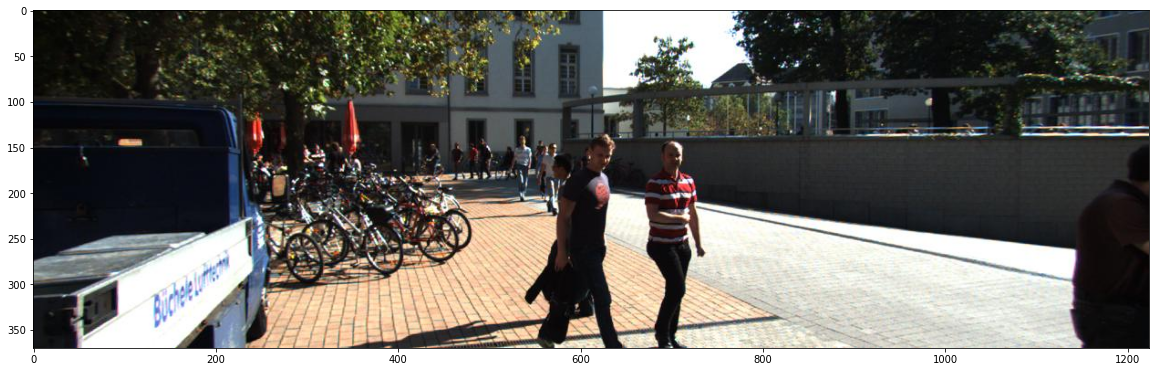

In [15]:
im = cv2.imread("000043.jpg")
plt.figure(figsize=(20, 25))
plt.imshow(im[:,:,::-1])

In [28]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("Misc/cascade_mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE = 'cpu'
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = "weights/mask_rcnn.pkl"
cfg.MODEL.WEIGHTS = "weights/cascade_mask_rcnn.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [29]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0, 0, 0, 7, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0])
Boxes(tensor([[ 670.3610,  141.3281,  738.4330,  368.7413],
        [1136.5161,  143.7155, 1223.8696,  368.8913],
        [ 552.7291,  135.8572,  647.9824,  370.0000],
        [   0.0000,   95.5280,  261.9716,  363.5382],
        [ 255.5865,  225.0606,  319.0391,  300.0512],
        [ 295.3569,  195.2104,  406.1583,  294.2595],
        [ 523.5494,  136.7500,  549.0200,  210.1289],
        [ 458.1666,  144.6802,  474.3176,  186.7832],
        [ 487.1190,  140.4373,  504.1021,  186.1684],
        [ 378.6392,  194.6158,  470.7454,  276.3878],
        [ 475.4018,  145.0811,  490.3599,  185.9603],
        [ 428.6522,  143.6086,  447.3599,  180.6530],
        [ 236.8028,  160.2761,  280.8447,  213.0683],
        [ 552.5788,  143.2077,  575.7813,  223.2864]]))


In [30]:
outputs['instances'] = outputs['instances'][outputs['instances'].pred_classes == 0]

In [31]:
outputs

{'instances': Instances(num_instances=9, image_height=370, image_width=1224, fields=[pred_boxes: Boxes(tensor([[ 670.3610,  141.3281,  738.4330,  368.7413],
         [1136.5161,  143.7155, 1223.8696,  368.8913],
         [ 552.7291,  135.8572,  647.9824,  370.0000],
         [ 523.5494,  136.7500,  549.0200,  210.1289],
         [ 458.1666,  144.6802,  474.3176,  186.7832],
         [ 487.1190,  140.4373,  504.1021,  186.1684],
         [ 475.4018,  145.0811,  490.3599,  185.9603],
         [ 428.6522,  143.6086,  447.3599,  180.6530],
         [ 552.5788,  143.2077,  575.7813,  223.2864]])), scores: tensor([0.9975, 0.9951, 0.9810, 0.8361, 0.7396, 0.6991, 0.6042, 0.5420, 0.5103]), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, F

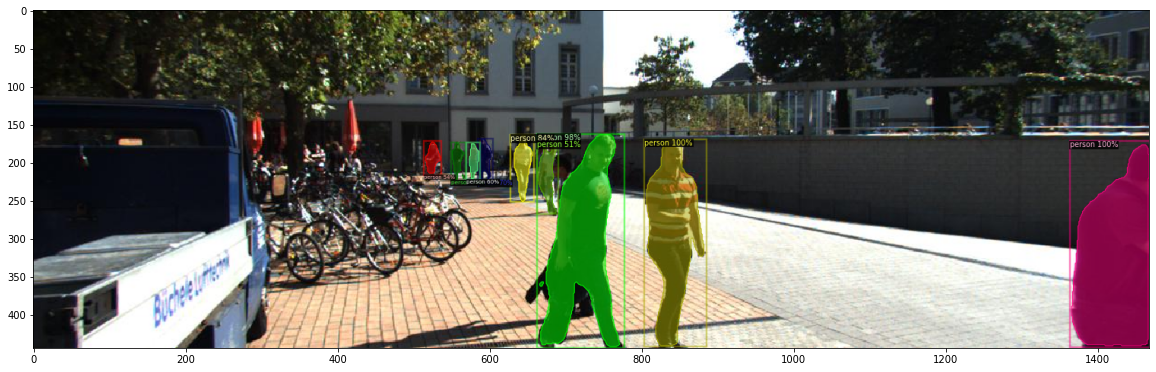

In [32]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20, 25))
plt.imshow(out.get_image())